In [3]:
from custgeneratorv2 import customerMaker, customerFeeder
from sumplotter import plot_arm_loss, plot_c_regret, plot_c_reward
from modelbuilderv2 import ringDealerSinglePrice
import tensorflow as tf
import numpy as np
from tqdm import tqdm

In [5]:
tf.reset_default_graph() #Clear the Tensorflow graph.
cust = customerMaker() #Load the bandits.|
rd = ringDealerSinglePrice(lr=0.001,n_hidden_affine=64,n_cell_affine=2) #Load the agent
#aka epochs
epochs = 50000
e = 0.1
#create a list to track loss
#to calc cumulative reward
c_reward = {'wtp':[], 'model':[], 'one': [],
            'two': [], 'three':[], 'four':[], 'five':[]}

#dictionary of lists to store losses by arm
losses = {1:[],2:[],3:[],4:[],5:[]}

In [6]:
#%%time
init = tf.initialize_all_variables()
logs_path = "tensorboard/temporal_price_board_2"
# Launch the tensorflow graph
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter(logs_path, sess.graph)
    for i in tqdm(range(epochs)):
        context = cust.getContext()
        species_num, magic_num, power_num, status_num = cust.contextToNum()
        wtp = cust.getWtp() #later we can change this to exist for every single one of 6
        
        feed_dict={rd.species_in:[species_num],
                   rd.magic_in:[magic_num],
                   rd.power_in:[power_num],
                   rd.status_in:[status_num]}
        
        if np.random.rand(1) < e: #explore!
            #choose a random action (from 0-1 for now)
            action = np.random.randint(1,6) #because we never find it favorable to choose 0 
            exploit = False #remember we explore
        else:
            action = int(sess.run(rd.best_action,feed_dict={rd.species_in:[species_num],
                                                           rd.magic_in:[magic_num],
                                                           rd.power_in:[power_num],
                                                           rd.status_in:[status_num]}))
            exploit = True
        
        deal = cust.acceptOffer(action) #change to another offer later
        #add deal or no deal to the dictionary
        
        feed_dict[rd.reward_holder] = [deal]
        feed_dict[rd.action_holder] = [int(action)]
        
        _, ls, p, a2 = sess.run([rd.update,rd.loss,rd.chosen_prob, rd.probs], feed_dict=feed_dict)
        
                #store rewards
        c_reward['wtp'].append(wtp)
        c_reward['model'].append(action * deal)
        c_reward['one'].append(1 * cust.acceptOffer(1))
        c_reward['two'].append(2 * cust.acceptOffer(2))
        c_reward['three'].append(3 * cust.acceptOffer(3))
        c_reward['four'].append(4 * cust.acceptOffer(4))
        c_reward['five'].append(5 * cust.acceptOffer(5))
        
        #if loss belongs to arm, append it
        if action is not 0:
            losses[action].append(ls)
    
        if i % 5000 is 0:
            if exploit:
                print("EXPLOIT")
            else:
                print("EXPLORE")
            print("context is: {}".format(context))
            print("wtp is {}, chose {}".format(wtp, action)) #hard coded for now
            print("probablity of  accept is {}".format(float(p)))
            print("probablity of 2 is {}".format(a2))

Instructions for updating:
Use `tf.global_variables_initializer` instead.


  0%|          | 22/50000 [00:00<1:09:00, 12.07it/s]

EXPLOIT
context is: ('human', 'advanced', 'unambitious', 'proletariat')
wtp is 0, chose 5
probablity of  accept is 0.5465826392173767
probablity of 2 is [ 0.46782085  0.51644969  0.45300037  0.4750801   0.52774733  0.54658264]


 10%|█         | 5030/50000 [00:30<03:52, 193.73it/s]

EXPLOIT
context is: ('wizard', 'beginner', 'unambitious', 'landlord')
wtp is 4, chose 4
probablity of  accept is 0.8920532464981079
probablity of 2 is [ 0.4265489   0.90941542  0.8074494   0.75438434  0.89205325  0.04126432]


 20%|██        | 10023/50000 [01:06<05:06, 130.59it/s]

EXPLOIT
context is: ('hobbit', 'advanced', 'thirsty', 'landlord')
wtp is 4, chose 1
probablity of  accept is 0.6003419160842896
probablity of 2 is [ 0.42731017  0.60034192  0.15426545  0.02244504  0.03894519  0.02711675]


 30%|███       | 15036/50000 [01:39<03:10, 183.79it/s]

EXPLOIT
context is: ('hobbit', 'medium', 'thirsty', 'bourgeoisie')
wtp is 2, chose 5
probablity of  accept is 0.18330270051956177
probablity of 2 is [ 0.41449699  0.58967328  0.06404961  0.11633487  0.03221941  0.1833027 ]


 40%|████      | 20014/50000 [02:16<04:40, 106.86it/s]

EXPLOIT
context is: ('dwarf', 'advanced', 'unambitious', 'proletariat')
wtp is 0, chose 1
probablity of  accept is 0.3592504858970642
probablity of 2 is [ 0.48757201  0.35925049  0.0580278   0.06695858  0.03372087  0.00632756]


 50%|█████     | 25016/50000 [02:51<04:04, 102.14it/s]

EXPLOIT
context is: ('wizard', 'advanced', 'thirsty', 'proletariat')
wtp is 3, chose 4
probablity of  accept is 0.7255340218544006
probablity of 2 is [ 0.41491693  0.9330464   0.93641782  0.62514967  0.72553402  0.00401745]


 60%|██████    | 30024/50000 [03:31<02:22, 140.00it/s]

EXPLOIT
context is: ('dwarf', 'advanced', 'unambitious', 'landlord')
wtp is 0, chose 4
probablity of  accept is 0.523156464099884
probablity of 2 is [ 0.48042297  0.72410393  0.39188924  0.59313715  0.52315646  0.29112482]


 70%|███████   | 35021/50000 [04:17<01:52, 133.60it/s]

EXPLOIT
context is: ('dragon', 'beginner', 'unambitious', 'proletariat')
wtp is 5, chose 5
probablity of  accept is 0.7023569345474243
probablity of 2 is [ 0.47373471  0.98743743  0.99800855  0.95732158  0.65957022  0.70235693]


 80%|████████  | 40029/50000 [04:59<00:59, 167.87it/s]

EXPLORE
context is: ('dwarf', 'beginner', 'thirsty', 'proletariat')
wtp is 5, chose 5
probablity of  accept is 0.18655739724636078
probablity of 2 is [ 0.47699642  0.53563815  0.06691488  0.36071384  0.29725948  0.1865574 ]


 90%|█████████ | 45021/50000 [05:31<00:28, 174.69it/s]

EXPLOIT
context is: ('dragon', 'medium', 'thirsty', 'proletariat')
wtp is 5, chose 5
probablity of  accept is 0.9376763105392456
probablity of 2 is [ 0.46461043  0.99433362  0.99804223  0.91922081  0.74116522  0.93767631]


100%|██████████| 50000/50000 [06:06<00:00, 136.32it/s]


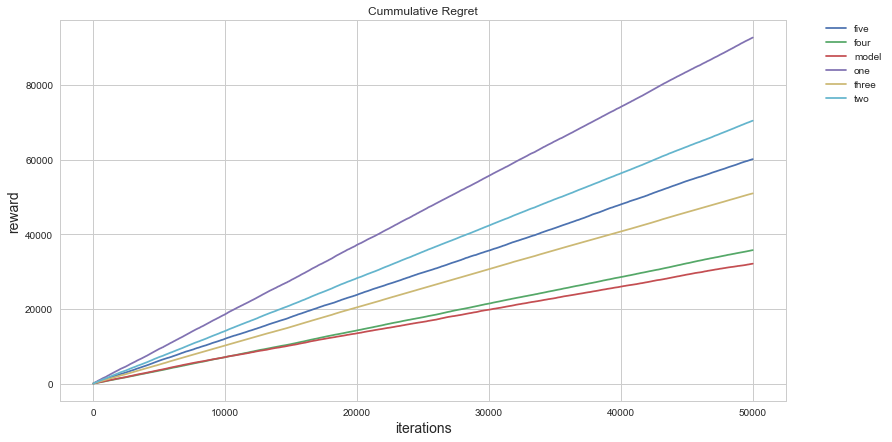

In [7]:
######PERFORMANCE##########
#total cummulative regret
plot_c_regret(c_reward)

/Users/daryazmachynskaya/gU/DL/PROJECT/final/sumplotter.py:56: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=20,min_periods=0,adjust=True,ignore_na=False).mean()
  loss = pd.ewma(loss, span=smooth)


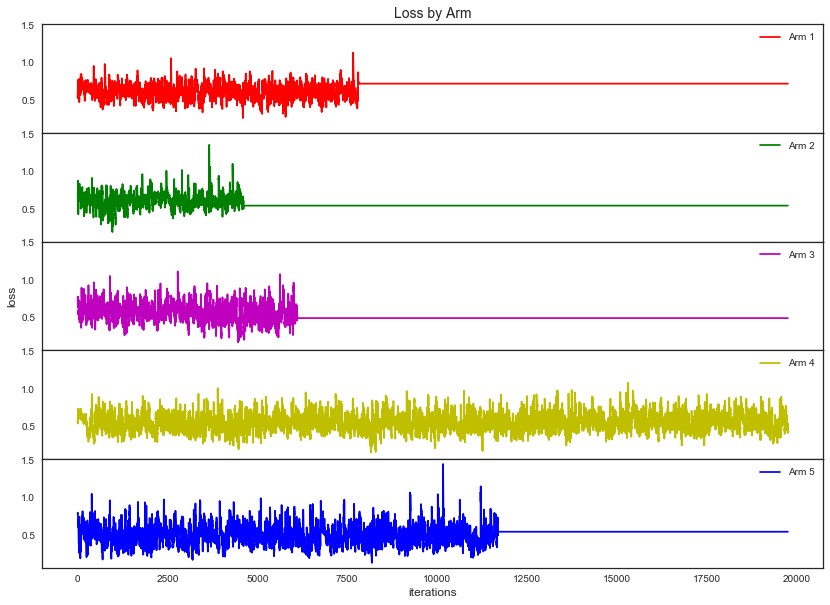

In [8]:
plot_arm_loss(losses, smooth=20)